# Restaurant Menu Data Preprocessing & Exploratory Data Analysis 

In [1]:
#Import libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('menu.csv')
df

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6


In [2]:
#create function to check for missing values in the data

def count_of_null(df):
    count=df.isnull().sum().sum()
    return count

# print missing value count in the data
count_null = count_of_null(df)
print(count_null)

0


In [3]:
#create function to check duplicate values in the data
def check_duplicates(df):
    count=df.duplicated().sum().sum()
    return count

# print duplicate values in the data
count_duplicates = check_duplicates(df)
print(count_duplicates)

0


In [4]:
#create a function to check information about the data
def about_data (df):
        about=df.info()
        return about
    
#print information about the data
info=about_data (df)
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [5]:
# create function to print unique values in the dataframe

def print_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Column '{column}' has {len(unique_values)} unique values:")
        print(unique_values)
print_unique_values(df)

Column 'Category' has 9 unique values:
['Breakfast' 'Beef & Pork' 'Chicken & Fish' 'Salads' 'Snacks & Sides'
 'Desserts' 'Beverages' 'Coffee & Tea' 'Smoothies & Shakes']
Column 'Item' has 260 unique values:
['Egg McMuffin' 'Egg White Delight' 'Sausage McMuffin'
 'Sausage McMuffin with Egg' 'Sausage McMuffin with Egg Whites'
 'Steak & Egg McMuffin' 'Bacon, Egg & Cheese Biscuit (Regular Biscuit)'
 'Bacon, Egg & Cheese Biscuit (Large Biscuit)'
 'Bacon, Egg & Cheese Biscuit with Egg Whites (Regular Biscuit)'
 'Bacon, Egg & Cheese Biscuit with Egg Whites (Large Biscuit)'
 'Sausage Biscuit (Regular Biscuit)' 'Sausage Biscuit (Large Biscuit)'
 'Sausage Biscuit with Egg (Regular Biscuit)'
 'Sausage Biscuit with Egg (Large Biscuit)'
 'Sausage Biscuit with Egg Whites (Regular Biscuit)'
 'Sausage Biscuit with Egg Whites (Large Biscuit)'
 'Southern Style Chicken Biscuit (Regular Biscuit)'
 'Southern Style Chicken Biscuit (Large Biscuit)'
 'Steak & Egg Biscuit (Regular Biscuit)' 'Bacon, Egg & Chees

In [6]:
#Create function to check statistical summary of the dataset
def stat_summary (df):
    statistics_sum = df.describe()
    return statistics_sum
#print statistical summary of data
summary = stat_summary (df)
summary

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [7]:
#create function to find columns with Categorical Values

def categorical_columns (df):
    cat_cols= df.select_dtypes(include=['object']).columns.tolist()
    return cat_cols
#print categorical columns
categorical = categorical_columns (df)
categorical

['Category', 'Item', 'Serving Size']

In [8]:
#create function to find columns with Numerical Values

def numerical_columns (df):
    num_cols = df.select_dtypes(exclude=['object']).columns.tolist()
    return num_cols
#print numerical columns
numerical = numerical_columns (df)
numerical

['Calories',
 'Calories from Fat',
 'Total Fat',
 'Total Fat (% Daily Value)',
 'Saturated Fat',
 'Saturated Fat (% Daily Value)',
 'Trans Fat',
 'Cholesterol',
 'Cholesterol (% Daily Value)',
 'Sodium',
 'Sodium (% Daily Value)',
 'Carbohydrates',
 'Carbohydrates (% Daily Value)',
 'Dietary Fiber',
 'Dietary Fiber (% Daily Value)',
 'Sugars',
 'Protein',
 'Vitamin A (% Daily Value)',
 'Vitamin C (% Daily Value)',
 'Calcium (% Daily Value)',
 'Iron (% Daily Value)']

In [9]:
#Removing extra spaces from the features Using strip()
df.columns = df.columns.str.strip()

In [10]:
#print count of each Category
df['Category'].value_counts()

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Beverages             27
Chicken & Fish        27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

# visualization

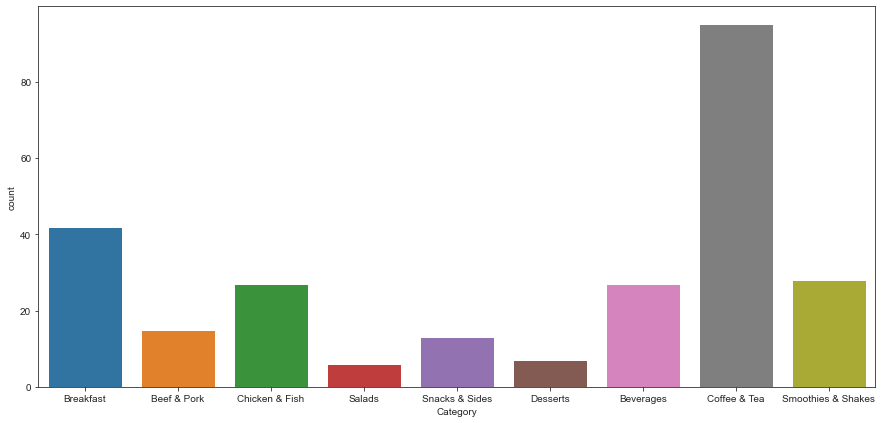

In [11]:
#countplot of Category
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

sns.set_style('ticks')
plt.figure(figsize = (15, 7))
sns.countplot(df['Category']);
plt.show()

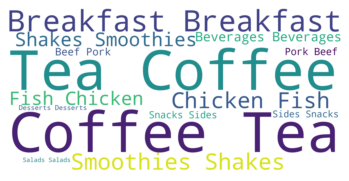

In [12]:
#wordcloud visualization of the Category
import re
import nltk
#nltk.download('stopwords')
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
# Create stopword list:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('newWord')
textt = " ".join(Category for Category in df.Category)
#wordcloud = WordCloud(stopwords=stopwords).generate(textt)
wordcloud = WordCloud(stopwords=stopwords,background_color='white',mode="RGB", width=2000, height=1000).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

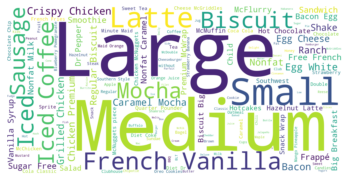

In [13]:
#wordcloud visualization of the Item
import re
import nltk
#nltk.download('stopwords')
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
# Create stopword list:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('newWord')
textt = " ".join(Item for Item in df.Item)
#wordcloud = WordCloud(stopwords=stopwords).generate(textt)
wordcloud = WordCloud(stopwords=stopwords,background_color='white',mode="RGB", width=2000, height=1000).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

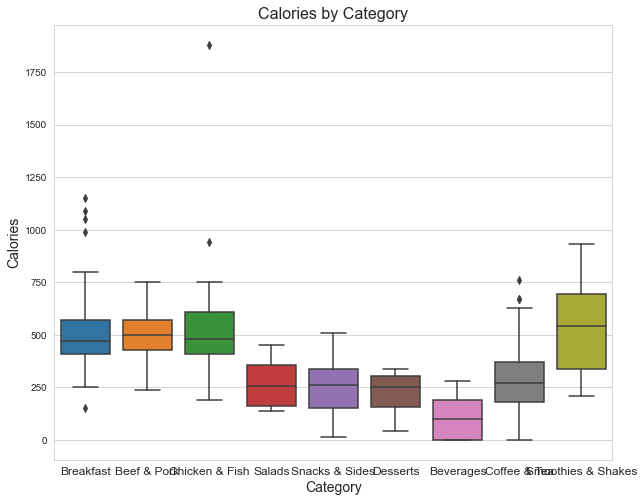

In [14]:
# Create grouped boxplot of Category and Calories
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.boxplot(x=df['Category'], y=df['Calories'])

# Set the x axis label size
ax = plt.gca()  # Get the current axis object
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

# Add plot title and axis labels
plt.title("Calories by Category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Calories", fontsize=14)

# Show the plot
plt.show()


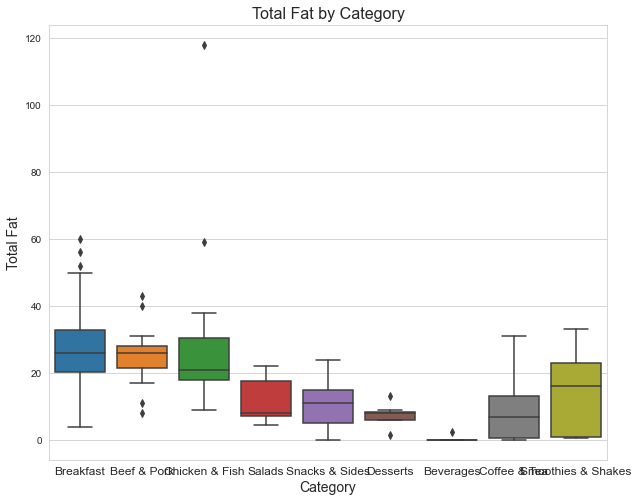

In [15]:
# Create grouped boxplot of Category and Total Fat
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.boxplot(x=df['Category'], y=df['Total Fat'])

# Set the x axis label size
ax = plt.gca()  # Get the current axis object
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

# Add plot title and axis labels
plt.title("Total Fat by Category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Total Fat", fontsize=14)

# Show the plot
plt.show()

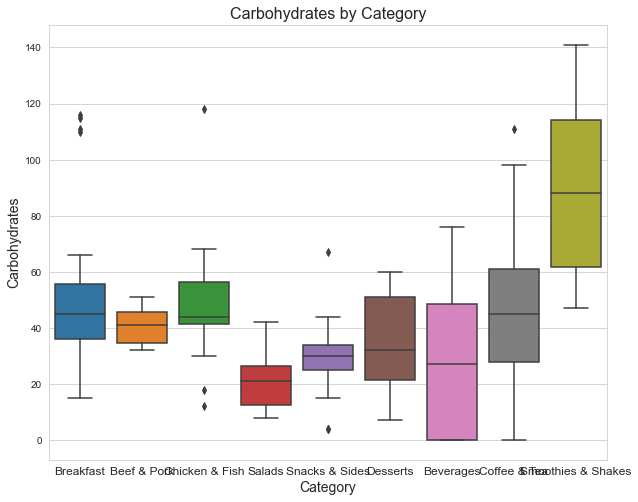

In [16]:
# Create grouped boxplot of Category and Carbohydrates
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.boxplot(x=df['Category'], y=df['Carbohydrates'])

# Set the x axis label size
ax = plt.gca()  # Get the current axis object
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

# Add plot title and axis labels
plt.title("Carbohydrates by Category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Carbohydrates", fontsize=14)

# Show the plot
plt.show()

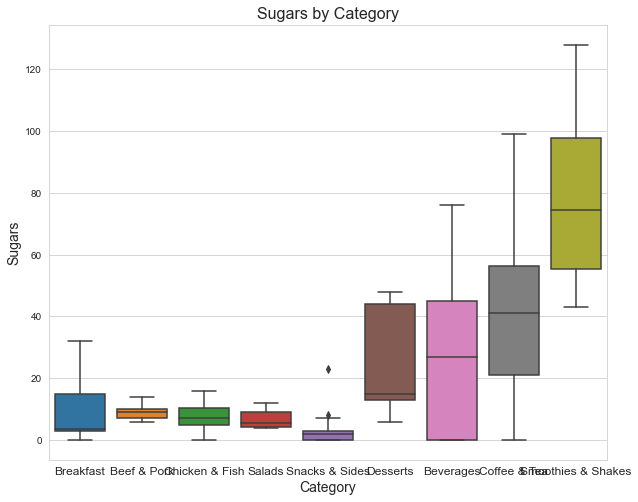

In [17]:
# Create grouped boxplot of Category and Sugars
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.boxplot(x=df['Category'], y=df['Sugars'])

# Set the x axis label size
ax = plt.gca()  # Get the current axis object
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

# Add plot title and axis labels
plt.title("Sugars by Category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Sugars", fontsize=14)

# Show the plot
plt.show()

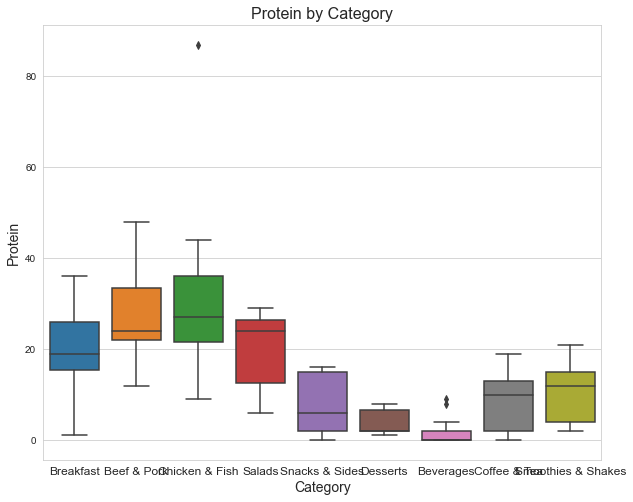

In [18]:
# Create grouped boxplot of Category and Protein
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.boxplot(x=df['Category'], y=df['Protein'])

# Set the x axis label size
ax = plt.gca()  # Get the current axis object
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

# Add plot title and axis labels
plt.title("Protein by Category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Protein", fontsize=14)

# Show the plot
plt.show()

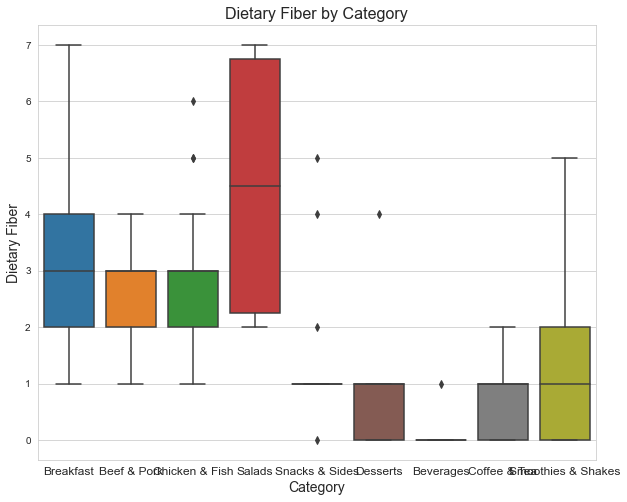

In [19]:
# Create grouped boxplot of Category and Dietary Fiber
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.boxplot(x=df['Category'], y=df['Dietary Fiber'])

# Set the x axis label size
ax = plt.gca()  # Get the current axis object
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

# Add plot title and axis labels
plt.title("Dietary Fiber by Category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Dietary Fiber", fontsize=14)

# Show the plot
plt.show()

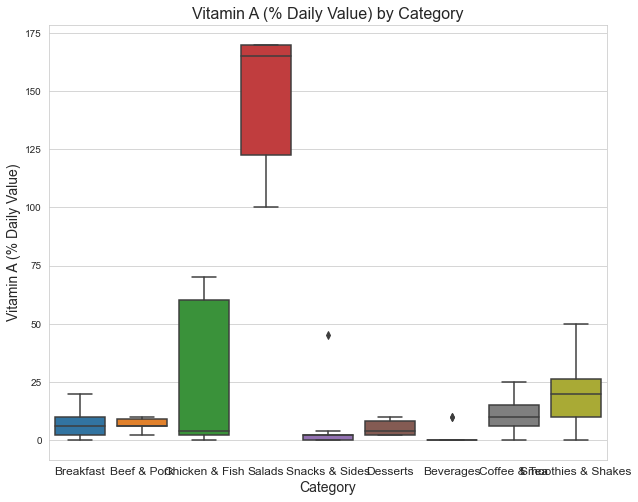

In [20]:
# Create grouped boxplot of Category and Vitamin A (% Daily Value)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.boxplot(x=df['Category'], y=df['Vitamin A (% Daily Value)'])

# Set the x axis label size
ax = plt.gca()  # Get the current axis object
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

# Add plot title and axis labels
plt.title("Vitamin A (% Daily Value) by Category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Vitamin A (% Daily Value)", fontsize=14)

# Show the plot
plt.show()

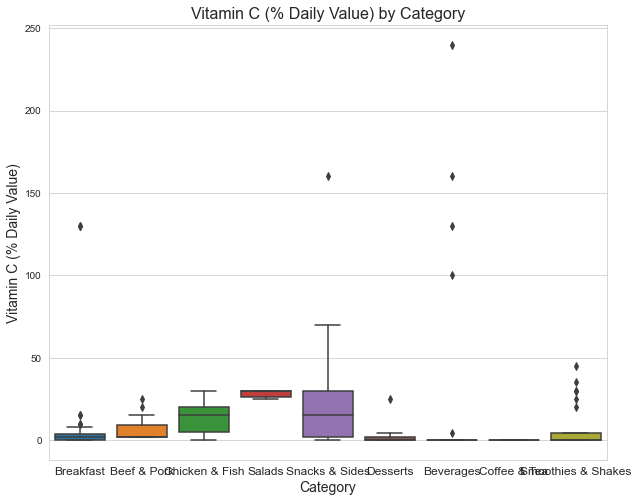

In [21]:
# Create grouped boxplot of Category and Vitamin C (% Daily Value)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.boxplot(x=df['Category'], y=df['Vitamin C (% Daily Value)'])

# Set the x axis label size
ax = plt.gca()  # Get the current axis object
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

# Add plot title and axis labels
plt.title("Vitamin C (% Daily Value) by Category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Vitamin C (% Daily Value)", fontsize=14)

# Show the plot
plt.show()

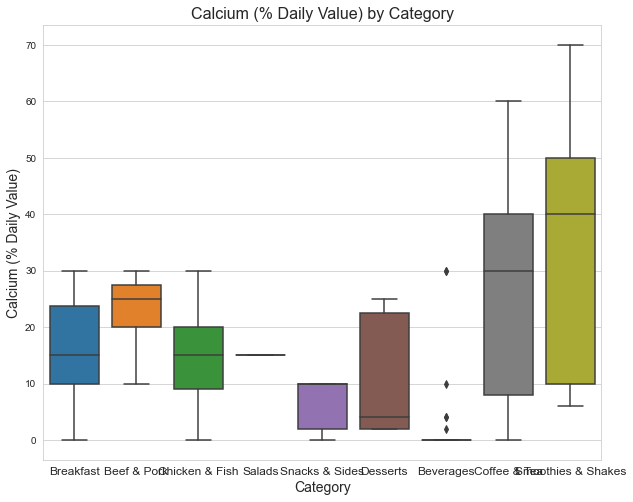

In [22]:
# Create grouped boxplot of Category and Calcium (% Daily Value)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.boxplot(x=df['Category'], y=df['Calcium (% Daily Value)'])

# Set the x axis label size
ax = plt.gca()  # Get the current axis object
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

# Add plot title and axis labels
plt.title("Calcium (% Daily Value) by Category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Calcium (% Daily Value)", fontsize=14)

# Show the plot
plt.show()

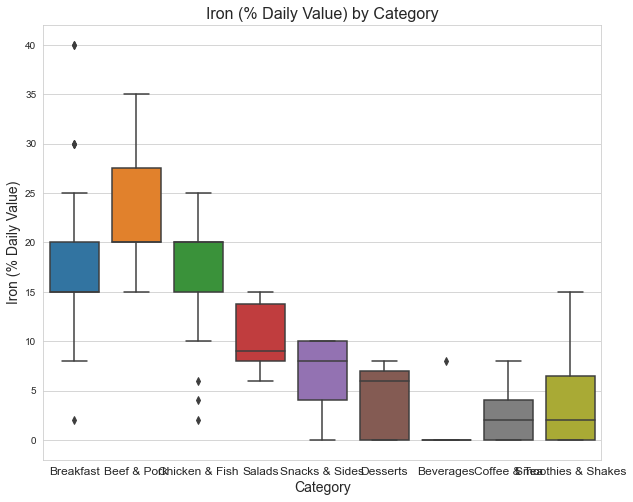

In [23]:
# Create grouped boxplot of Category and Iron (% Daily Value)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.boxplot(x=df['Category'], y=df['Iron (% Daily Value)'])

# Set the x axis label size
ax = plt.gca()  # Get the current axis object
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

# Add plot title and axis labels
plt.title("Iron (% Daily Value) by Category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Iron (% Daily Value)", fontsize=14)

# Show the plot
plt.show()

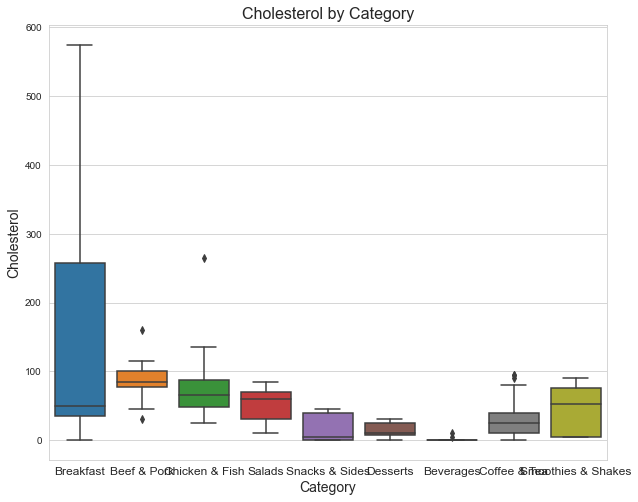

In [24]:
# Create grouped boxplot of Category and Cholesterol
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.boxplot(x=df['Category'], y=df['Cholesterol'])

# Set the x axis label size
ax = plt.gca()  # Get the current axis object
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

# Add plot title and axis labels
plt.title("Cholesterol by Category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Cholesterol", fontsize=14)

# Show the plot
plt.show()

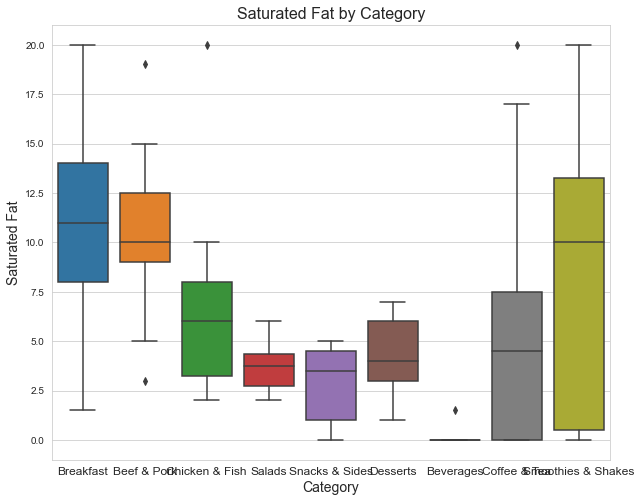

In [25]:
# Create grouped boxplot of Category and Saturated Fat
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.boxplot(x=df['Category'], y=df['Saturated Fat'])

# Set the x axis label size
ax = plt.gca()  # Get the current axis object
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

# Add plot title and axis labels
plt.title("Saturated Fat by Category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Saturated Fat", fontsize=14)

# Show the plot
plt.show()

<AxesSubplot:>

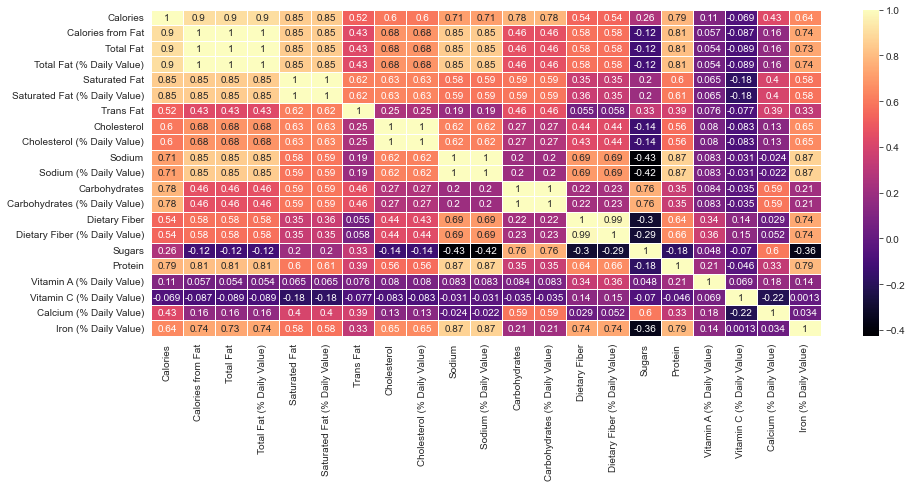

In [26]:
#Correlation_Heatmap of features
plt.figure(figsize=(15, 6))
sns.heatmap(df.corr(),annot=True,cmap='magma',linewidths=1)

In [27]:
#Finding Outliers using IQR score

#The IQR is the first quartile subtracted from the third quartile; 
#these quartiles can be clearly seen on a box plot on the data.
# calculate IQR score
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
# IQR of each column

Calories                         290.000
Calories from Fat                180.000
Total Fat                         19.875
Total Fat (% Daily Value)         31.250
Saturated Fat                      9.000
Saturated Fat (% Daily Value)     43.250
Trans Fat                          0.000
Cholesterol                       60.000
Cholesterol (% Daily Value)       19.250
Sodium                           757.500
Sodium (% Daily Value)            31.500
Carbohydrates                     30.000
Carbohydrates (% Daily Value)     10.000
Dietary Fiber                      3.000
Dietary Fiber (% Daily Value)     10.000
Sugars                            42.250
Protein                           15.000
Vitamin A (% Daily Value)         13.000
Vitamin C (% Daily Value)          4.000
Calcium (% Daily Value)           24.000
Iron (% Daily Value)              15.000
dtype: float64


In [28]:
#remove outlier
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(154, 24)

In [29]:
# load cleaned dataframe into CSV file.
df.to_csv('menufinal.csv', index=False, header=True)

# Mysql Database Development

In [30]:
#create a database in MySQL, using the "CREATE DATABASE" statement
#import mysql.connector

#mydb = mysql.connector.connect(
  #host="enter your host",
  #user="enter your root",
  #password="enter your password"
#)

#mycursor = mydb.cursor()

#mycursor.execute("CREATE DATABASE Restaurantmenu")  # set database name 

In [31]:
# check if a database exist by listing all databases in the system using the "SHOW DATABASES" statement:
#mydb = mysql.connector.connect(
  #host="enter your host",
  #user="enter your root",
  #password="enter your password"
#)

#mycursor = mydb.cursor()

#mycursor.execute("SHOW DATABASES")

#for x in mycursor:
    #print(x)